In [226]:
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
df = pd.read_csv("diabetes_dataset.csv", header=None, names=col_names)

In [228]:
df.drop(0, inplace=True)
df

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [230]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = df[feature_cols] # Features
y = df.label
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Drop the duplicate rows in the dataset
df = df.drop_duplicates()

Number of duplicate rows: 0


In [232]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42 , stratify = y)

In [234]:
# import the class
from sklearn.linear_model import LogisticRegression

# start the model (using the default parameters)
logreg = LogisticRegression(random_state=16 , max_iter=500)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [236]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[105,  20],
       [ 32,  35]])

Text(0.5, 23.52222222222222, 'Predicted label')

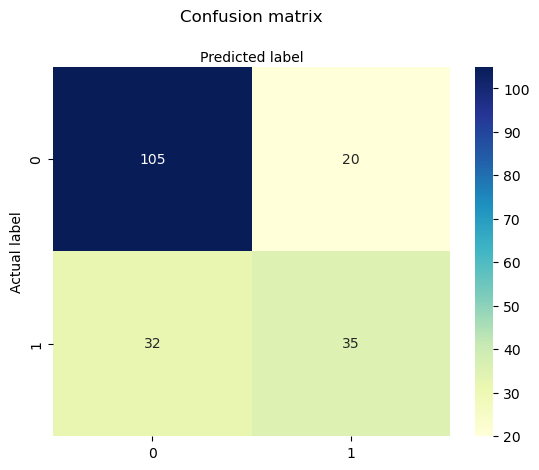

In [238]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#setting up confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [240]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.77      0.84      0.80       125
   with diabetes       0.64      0.52      0.57        67

        accuracy                           0.73       192
       macro avg       0.70      0.68      0.69       192
    weighted avg       0.72      0.73      0.72       192



In [242]:
#gridsearch
C = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

scores = []

for choice in C:
  logreg.set_params(C=choice)
  logreg.fit(X, y)
  scores.append(logreg.score(X, y))

In [244]:
for score in scores:
    print(score)

0.7786458333333334
0.78125
0.78125
0.78125
0.78125
0.7825520833333334
0.7825520833333334
0.7825520833333334


In [246]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],       # Regularization strength
    'solver': ['lbfgs', 'liblinear'],    # Solvers for Logistic Regression
    'max_iter': [1000, 2000, 3000],         # Maximum number of iterations
}

# Set up the GridSearchCV with cross-validation
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Display the best parameters and the best score found
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("Test Set Accuracy:", test_accuracy)

Best Parameters: {'C': 10, 'max_iter': 1000, 'solver': 'lbfgs'}
Best Cross-Validated Accuracy: 0.7795502248875562
Test Set Accuracy: 0.7291666666666666


In [248]:
# Retrieve and organize coefficients
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': best_model.coef_[0]
})

# Sort by absolute value of coefficients to find the most impactful features
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print("Feature Importance (sorted by absolute coefficient value):")
print(feature_importance[['Feature', 'Coefficient']]) #larger absolute values indicate the feature has more importance

Feature Importance (sorted by absolute coefficient value):
    Feature  Coefficient
6  pedigree     0.716331
0  pregnant     0.132864
2       bmi     0.094366
4   glucose     0.035741
3       age     0.012756
5        bp    -0.011376
1   insulin    -0.000841
